# Working with Output Data Example

In [2]:
import json
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from nccut.chain_data_file_printer import chain_data_file_printer

In [4]:
# Load and print chain data file
f = open("orthogonal_project_example.json")
c_dat = json.load(f)
chain_data_file_printer(c_dat, 0)

Vorticity:
    Orthogonal Chain 1:
        Average: [-5.384873294488247e-06, -1.0483989319216648e-05, ...]
        Cut 1:
            x: [952.1830179101382, 952.3704869950517, ...]
            y: [806.0, 807.0, ...]
            Cut: [4.085727721118916e-06, 3.7812313769162205e-06, ...]
        Cut 2:
            x: [973.4482456383778, 973.948163198147, ...]
            y: [796.0, 797.0, ...]
            Cut: [1.3868737420881005e-05, 8.443310959585394e-06, ...]
        Cut 3:
            x: [984.0, 985.0, ...]
            y: [786.4991971458151, 786.8776379216832, ...]
            Cut: [2.780286493829907e-05, 3.2852090453666086e-05, ...]
        Cut 4:
            x: [986.0, 987.0, ...]
            y: [765.7096517715099, 765.5003149303735, ...]
            Cut: [1.9630421222256992e-05, 1.9730021403655218e-05, ...]
        Cut 5:
            x: [980.865171405334, 980.8843990037866, ...]
            y: [724.0, 725.0, ...]
            Cut: [-1.2670396009372102e-05, 1.3547681545693076e-05, ..

Text(0, 0.5, 'Vorticity')

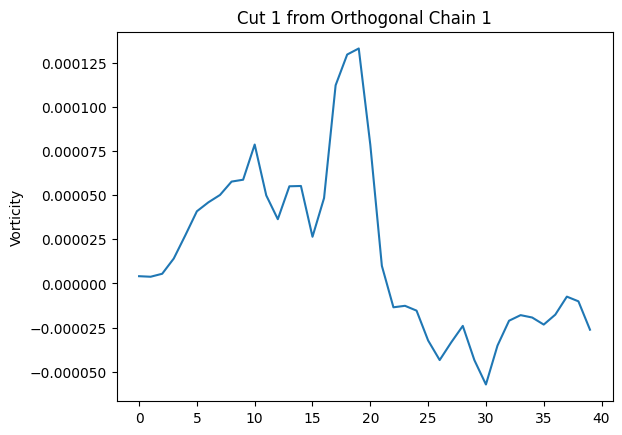

In [6]:
# Plot a Single Cut
plt.plot(c_dat["Vorticity"]["Orthogonal Chain 1"]["Cut 1"]["Cut"])
plt.title("Cut 1 from Orthogonal Chain 1")
plt.ylabel("Vorticity")

In [8]:
# Load the NetCDF file 
nc_dat = xr.open_dataset("example_4v.nc")
print(nc_dat)

<xarray.Dataset> Size: 54MB
Dimensions:       (y: 1499, x: 1499)
Coordinates:
    lon           (y, x) float32 9MB ...
    lat           (y, x) float32 9MB ...
    time          int64 8B ...
    k             int64 8B ...
    face          int64 8B ...
Dimensions without coordinates: y, x
Data variables:
    Divergence    (y, x) float32 9MB ...
    Vorticity     (y, x) float32 9MB ...
    Shear         (y, x) float32 9MB ...
    Rosby Number  (y, x) float32 9MB ...


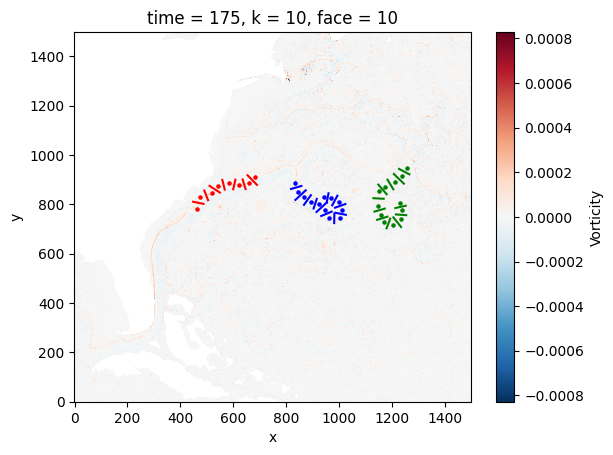

In [10]:
# Plot the Chains over the NetCDF File

nc_dat["Vorticity"].plot()

colors = ["b", "g", "r"]

# Loop over chains in "Vorticity" variable (the last index is metadata so it's omitted)
for ind, chain in enumerate(list(c_dat["Vorticity"].keys())[:-1]):
    # Plot the click points
    plt.scatter(c_dat["Vorticity"][chain]["Click x"], c_dat["Vorticity"][chain]["Click y"], s=5, color=colors[ind])
    # Plot each Transect (first index is average, last two indices are click x and click y coordinates)
    for cut in list(c_dat["Vorticity"][chain].keys())[1:-3]:
        plt.plot(c_dat["Vorticity"][chain][cut]["x"], c_dat["Vorticity"][chain][cut]["y"], color=colors[ind])
